In [1]:
import pandas as pd

In [118]:
res_hr = pd.read_csv('../results/hr/from_scratch_bleu_eval_scores.csv')
res_hr['seed'] = res_hr['model'].apply(lambda x: x.split('_')[-1])
res_hr['model'] = res_hr['model'].apply(lambda x: "_".join(x.split('_')[:-1]))

res_hr = res_hr.groupby(['model', 'test_file']).agg({'bleu': ['mean', 'std']})

# drop the top level of the multiindex
res_hr.columns = res_hr.columns.droplevel(0)
res_hr = res_hr.reset_index()
# # compute the sum of the estimated variances per model per test_file
res_hr['variance'] = res_hr['std'] ** 2
res_hr = res_hr.groupby(['model', 'test_file']).agg({'variance': 'sum'}).reset_index()
# pivot the table to have the test_files as columns
res_hr = res_hr.pivot(index='model', columns='test_file', values='variance').reset_index()

# add the values in the first row to the values in each row
var = res_hr.add(res_hr.iloc[0], axis=1)
# remove first row
# var = var.iloc[1:]



In [1]:
# res_hr = pd.read_csv('../results/hr/from_scratch_bleu_scores.csv')
res_hr = pd.read_csv('../results/tr/from_scratch_comet_scores.csv')
# combine as strings bleu_mean rounded to 2 decimals +- bleu_std rounded to 2 decimals
# res_hr['bleu'] = res_hr['bleu_mean'].round(2).astype(str) + ' +- ' + res_hr['bleu_std'].round(2).astype(str)
res_hr['comet'] = round(res_hr['comet_mean']*100,2)
# pivot
# opus= pd.read_csv('../results/hr/opus_bleu_scores.csv')
# opus['bleu'] = opus['bleu_mean']
# res_hr = pd.concat([res_hr,opus])
res_hr = res_hr.pivot(index='model', columns='test_file', values=['comet_mean','comet_std']).reset_index()
res_hr 

NameError: name 'pd' is not defined

In [320]:
# compute difference between all rows and the first row
# res_hr = res_hr.sub(res_hr.iloc[0], axis=1).round(2)

# change index values
res_hr.index = ['Genre Agnostic', 'Genre Aware', 'Genre Aware +\n Token', 'Tokenizer +\n Genre Agnostic', 'Tokenizer +\n Genre Aware', 'Tokenizer +\n Genre Aware +\n Token']
# res_hr.index = ['Genre Agnostic', 'Genre Aware', 'Genre Aware +\n Token']

# remove first row
# res_hr = res_hr.iloc[1:]
res_hr

test_file,MaCoCu,floresdev,floresdevtest,wmttest2022
Genre Agnostic,77.35,74.27,74.25,67.66
Genre Aware,77.15,74.40,74.48,67.43
Genre Aware +\n Token,77.17,74.49,74.36,67.47
Tokenizer +\n Genre Agnostic,77.44,74.18,74.06,67.37
Tokenizer +\n Genre Aware,77.15,73.78,73.73,67.07
Tokenizer +\n Genre Aware +\n Token,75.38,72.39,72.13,64.71


In [321]:
# transpose the table
# res_hr = res_hr.T
res = res_hr.T
# change index values
res.index = ['MaCoCu', 'Flores dev', 'Flores devtest', 'WMT18']

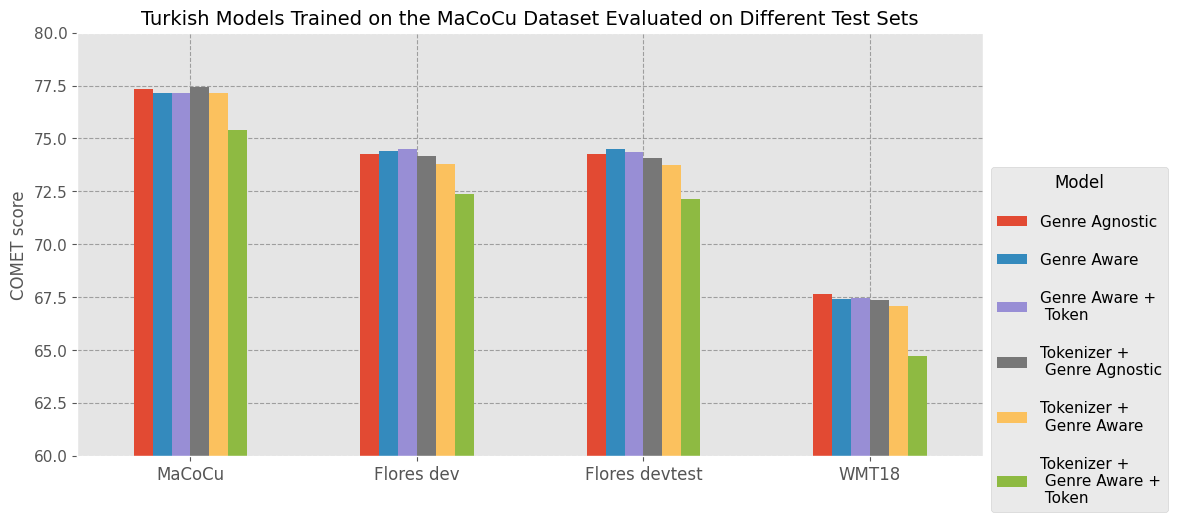

In [322]:
# make a bar chart
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from matplotlib.transforms import Affine2D

plt.style.use('ggplot')
res.plot(kind='bar', figsize=(10,5))
plt.grid(c='grey', alpha=0.7, linestyle='--')


plt.title('Turkish Models Trained on the MaCoCu Dataset Evaluated on Different Test Sets', fontsize=14)
plt.ylabel('COMET score', fontsize=12)
# plt.xlabel('Test set')
plt.xticks(rotation=0)
plt.ylim(60,80)
plt.tight_layout()
plt.legend(title='Model', bbox_to_anchor=(1.0, 0.7), loc='upper left', labelspacing=1.5, fontsize=11, title_fontsize=12)
plt.yticks(fontsize=11)
plt.xticks(fontsize=12)

# plt.savefig('../results/images/from-scratch_tr.png', bbox_inches='tight', transparent=True, dpi=300)
plt.show()


In [3]:
res_hr = pd.read_csv('../results/hr/from_scratch_comet_scores.csv')
# combine as strings comet_mean * 100 rounded to 2 decimals +- comet_std rounded to 2 decimals * 100
opus = pd.read_csv('../results/hr/opus_comet_scores.csv')
opus['comet'] = opus['comet_mean']
res_hr = pd.concat([res_hr,opus])
res_hr['comet'] = (res_hr['comet_mean']*100).round(2).astype(str) + ' +- ' + (res_hr['comet_std']*100).round(2).astype(str)
# pivot
res_hr = res_hr.pivot(index='model', columns='test_file', values='comet')
res_hr

test_file,MaCoCu,floresdev,floresdevtest,wmttest2022
model,,,,
baseline,77.35 +- 0.04,74.27 +- 0.07,74.25 +- 0.37,67.66 +- 0.28
baseline_op,81.06 +- nan,81.93 +- nan,81.23 +- nan,78.1 +- nan
genre_aware,77.15 +- 0.12,74.4 +- 0.29,74.48 +- 0.1,67.43 +- 0.17
genre_aware_token,77.17 +- 0.04,74.49 +- 0.27,74.36 +- 0.21,67.47 +- 0.11
tok_baseline,77.44 +- 0.11,74.18 +- 0.21,74.06 +- 0.3,67.37 +- 0.06
tok_genre_aware,77.15 +- 0.09,73.78 +- 0.16,73.73 +- 0.18,67.07 +- 0.16
tok_genre_aware_token,75.38 +- 0.23,72.39 +- 0.35,72.13 +- 0.3,64.71 +- 0.09


In [68]:
res_hr = pd.read_csv('../results/hr/from_scratch_comet_scores_per_genre.csv')
# only keep models baseline and genre_aware_token
# res_hr = res_hr[res_hr['model'].isin(['baseline', 'genre_aware_token'])]
# only keep results on MaCoCu
opus = pd.read_csv('../results/hr/opus_comet_scores_per_genre.csv')
opus['comet'] = opus['comet_mean']
res_hr = pd.concat([res_hr,opus])
res_hr = res_hr[res_hr['test_file'] == 'floresdevtest']
# aggregate over genres test files and models
# comet_mean * 100
res_hr['comet_mean'] = res_hr['comet_mean']*100
res_hr = res_hr.groupby(['model', 'genre', 'test_file']).agg({'comet_mean': ['mean', 'std']})
# drop level 1 of multiindex
res_hr.columns = res_hr.columns.droplevel(0)
#reste index
res_hr = res_hr.reset_index()
# combine as strings comet_mean * 100 rounded to 2 decimals +- comet_std rounded to 2 decimals * 100
res_hr['comet'] = (res_hr['mean']).round(2).astype(str) + ' +- ' + (res_hr['std']).round(2).astype(str)
# pivot
res_hr = res_hr.pivot(index='model', columns='genre', values='comet')
res_hr

genre,Forum,Information/Explanation,Instruction,News,Opinion/Argumentation,Other,Promotion
model,,,,,,,
baseline,60.39 +- 1.82,77.09 +- 0.72,75.97 +- 0.32,68.96 +- 0.68,75.23 +- 0.59,70.18 +- 2.0,72.62 +- 0.43
baseline_op,71.68 +- nan,81.28 +- nan,80.92 +- nan,81.19 +- nan,82.16 +- nan,74.73 +- nan,79.86 +- nan
genre_aware,65.51 +- 6.09,77.39 +- 0.38,75.96 +- 0.57,69.38 +- 0.18,74.67 +- 0.25,70.8 +- 4.47,73.28 +- 0.52
genre_aware_token,65.58 +- 3.04,76.9 +- 0.15,76.46 +- 0.79,69.49 +- 0.16,74.72 +- 0.34,69.18 +- 1.3,73.77 +- 1.72
tok_baseline,53.0 +- 0.96,77.04 +- 0.54,74.96 +- 0.6,69.12 +- 0.24,74.29 +- 1.03,72.75 +- 3.98,73.45 +- 0.48
tok_genre_aware,59.46 +- 5.26,76.65 +- 0.34,74.6 +- 0.36,68.91 +- 0.38,73.96 +- 0.99,70.6 +- 0.64,72.73 +- 2.96
tok_genre_aware_token,54.34 +- 7.29,75.0 +- 0.16,72.86 +- 0.73,67.4 +- 0.69,72.51 +- 1.0,72.54 +- 1.19,70.4 +- 1.84


In [17]:
# fine-tuning results
res_hr = pd.read_csv('../results/hr/fine_tune_bleu_scores.csv')
# remove rows with genre_aware_token_opus
res_hr = res_hr[~res_hr['model'].str.contains('genre_aware_token_opus')]
# combine as strings bleu_mean rounded to 2 decimals +- bleu_std rounded to 2 decimals
res_hr['bleu'] = res_hr['bleu_mean'].round(2).astype(str) + ' +- ' + res_hr['bleu_std'].round(2).astype(str)
# make train file column by splitting the model name
res_hr['train_file'] = res_hr['model'].apply(lambda x: x.split("_")[-1])
res_hr['model'] = res_hr['model'].apply(lambda x: "_".join(x.split("_")[:-1]))
# pivot
res_hr = res_hr.pivot(index=['model','train_file'], columns=['test_file'], values='bleu')
res_hr


test_file                            MaCoCu      floresdev  floresdevtest  \
model             train_file                                                
baseline          arg           17.9 +- 0.0  16.55 +- 0.21  16.85 +- 0.07   
                  info          18.0 +- 0.0  16.27 +- 0.31    16.8 +- 0.3   
                  law         15.07 +- 0.06   12.2 +- 0.26  12.67 +- 0.25   
                  news        18.03 +- 0.12   16.4 +- 0.26  17.23 +- 0.06   
                  promo       17.85 +- 0.07    15.1 +- 0.2    15.7 +- 0.2   
                  random      19.05 +- 0.07  17.03 +- 0.15  17.23 +- 0.35   
baseline_opus     arg           23.3 +- 0.0  24.07 +- 0.21  24.27 +- 0.25   
                  info        23.63 +- 0.06    24.4 +- 0.1  24.47 +- 0.21   
                  law           20.4 +- 0.0  19.77 +- 0.49   20.0 +- 0.36   
                  news        23.47 +- 0.06  24.27 +- 0.15  24.13 +- 0.15   
                  promo         23.3 +- 0.1  22.93 +- 0.23  22.77 +- 0.12   
                  random        24.6 +- 0.0  25.17 +- 0.21   25.2 +- 0.26   
genre_aware_token arg          17.4 +- 0.17   16.2 +- 0.35  16.57 +- 0.21   
                  info        17.63 +- 0.21   16.2 +- 0.17  16.93 +- 0.12   
                  law         14.83 +- 0.06    12.2 +- 0.1  12.77 +- 0.12   
                  news        17.53 +- 0.06    16.3 +- 0.1  16.37 +- 0.47   
                  promo       17.57 +- 0.15  14.63 +- 0.31  15.03 +- 0.35   
                  random        19.2 +- 0.0  17.13 +- 0.15  17.35 +- 0.07   

test_file                       wmttest2022  
model             train_file                 
baseline          arg         13.25 +- 0.07  
                  info        11.87 +- 0.23  
                  law            8.5 +- 0.2  
                  news        13.07 +- 0.21  
                  promo       11.37 +- 0.23  
                  random      12.83 +- 0.06  
baseline_opus     arg         21.03 +- 0.12  
                  info        20.47 +- 0.06  
                  law           16.2 +- 0.1  
                  news        21.13 +- 0.12  
                  promo       19.03 +- 0.32  
                  random      21.37 +- 0.15  
genre_aware_token arg         12.87 +- 0.06  
                  info        11.53 +- 0.21  
                  law            8.5 +- 0.2  
                  news        12.77 +- 0.12  
                  promo       10.87 +- 0.12  
                  random        13.1 +- 0.2

In [3]:
# fine-tuning results
res_hr = pd.read_csv('../results/hr/fine_tune_comet_scores_per_genre.csv')
# remove rows with genre_aware_token_opus
res_hr = res_hr[~res_hr['model'].str.contains('genre_aware_token')]
# make train file column by splitting the model name
res_hr['train_file'] = res_hr['model'].apply(lambda x: x.split("_")[-1])
res_hr['model'] = res_hr['model'].apply(lambda x: "_".join(x.split("_")[:-1]))

res_hr['comet_mean'] = res_hr['comet_mean']*100
res_hr = res_hr.groupby(['model', 'genre', 'test_file', 'train_file']).agg({'comet_mean': ['mean', 'std']})
# drop level 1 of multiindex
res_hr.columns = res_hr.columns.droplevel(0)
#reste index
res_hr = res_hr.reset_index()
# combine as strings comet_mean * 100 rounded to 2 decimals +- comet_std rounded to 2 decimals * 100
res_hr['comet'] = (res_hr['mean']).round(2).astype(str) + ' +- ' + (res_hr['std']).round(2).astype(str)
res_hr['mean'] = res_hr['mean'].round(2)
# pivot
res_hr = res_hr[res_hr['test_file']=='floresdevtest']
#remove seed

res_hr = res_hr.pivot(index=['model','train_file'], columns=['genre'], values='mean').sort_index(axis='columns')

res_hr=res_hr[[ 'Opinion/Argumentation', 'Information/Explanation', 'News', 'Promotion', 'Forum', 'Instruction', 'Other']]
res_hr

genre                     Opinion/Argumentation  Information/Explanation  \
model         train_file                                                   
baseline      arg                         76.47                    74.51   
              info                        71.77                    75.68   
              law                         63.59                    61.01   
              news                        71.94                    73.59   
              promo                       70.16                    70.71   
              random                      72.63                    75.00   
baseline_opus arg                         86.56                    86.01   
              info                        86.68                    86.88   
              law                         79.81                    77.49   
              news                        85.38                    85.50   
              promo                       85.70                    84.45   
              random                      87.17                    86.45   

genre                      News  Promotion  Forum  Instruction  Other  
model         train_file                                               
baseline      arg         67.62      73.23  65.79        72.80  73.48  
              info        65.58      73.10  55.01        73.16  73.02  
              law         56.32      53.14  53.16        66.28  59.14  
              news        69.37      68.46  67.21        72.36  71.72  
              promo       59.28      69.84  52.14        71.25  70.64  
              random      65.82      73.26  64.95        74.75  70.83  
baseline_opus arg         83.17      83.95  74.61        85.20  80.64  
              info        83.76      84.17  76.49        86.01  76.91  
              law         74.09      70.31  73.14        81.83  70.11  
              news        84.66      83.69  75.88        85.00  82.46  
              promo       79.12      82.85  76.38        84.70  79.60  
              random      83.81      84.35  73.84        86.80  79.24

In [24]:
# show opus scores per genre
opus = pd.read_csv('../results/hr/opus_comet_scores_per_genre.csv')
# opus['comet_mean'] = round(opus['comet_mean']*100,2)
# opus['comet_std'] = round(opus['comet_std']*100,2)
opus['comet'] = opus['comet_mean'].round(2).astype(str) + ' +- ' + opus['comet_std'].round(2).astype(str)
# remove comet_mean and comet_std columns, model and seed
opus = opus.drop(columns=['comet_mean', 'comet_std', 'model', 'seed'])
# opus = opus.groupby(['model', 'genre', 'test_file']).agg({'comet_mean': ['mean']})
# opus.columns = opus.columns.droplevel(0)
# opus = opus.reset_index()
# opus['comet'] = (opus['mean']).round(2).astype(str)
opus = opus.pivot(index='test_file', columns='genre', values='comet')
opus


genre,Forum,Information/Explanation,Instruction,Legal,News,Opinion/Argumentation,Other,Promotion,Prose/Lyrical
test_file,,,,,,,,,
MaCoCu,0.81 +- 0.13,0.82 +- 0.12,0.83 +- 0.12,0.81 +- 0.12,0.83 +- 0.12,0.81 +- 0.13,NaN,0.83 +- 0.12,0.74 +- 0.15
floresdev,0.88 +- 0.03,0.82 +- 0.12,0.82 +- 0.1,NaN,0.81 +- 0.12,0.8 +- 0.12,0.78 +- 0.04,0.85 +- 0.07,NaN
floresdevtest,0.72 +- 0.27,0.81 +- 0.11,0.81 +- 0.12,NaN,0.81 +- 0.12,0.82 +- 0.11,0.75 +- 0.12,0.8 +- 0.12,NaN
wmttest2022,0.8 +- 0.15,0.78 +- 0.15,0.78 +- 0.16,NaN,0.77 +- 0.15,0.78 +- 0.16,0.83 +- 0.09,0.76 +- 0.18,NaN


In [91]:
# show opus scores per genre for is
opus = pd.read_csv('../results/is/opus_comet_scores_per_genre.csv')
opus['comet'] = round(opus['comet_mean']*100,2)
# opus['comet'] = opus['comet_mean'].round(2).astype(str) + ' +- ' + opus['comet_std'].round(2).astype(str)
# remove comet_mean and comet_std columns, model and seed
opus = opus.drop(columns=['comet_mean', 'comet_std', 'model', 'seed'])
opus = opus.pivot(index='test_file', columns='genre', values='comet')
opus


genre,Forum,Information/Explanation,Instruction,Legal,News,Opinion/Argumentation,Other,Promotion,Prose/Lyrical
test_file,,,,,,,,,
MaCoCu,71.39,76.09,74.57,77.88,77.56,73.32,NaN,73.91,70.98
floresdev,79.18,78.10,75.51,NaN,73.85,71.86,61.66,78.75,NaN
floresdevtest,72.00,77.27,76.40,NaN,73.45,76.85,80.41,75.18,NaN
wmttest2021,NaN,59.94,NaN,NaN,69.88,66.52,NaN,NaN,NaN


In [333]:
#show is scores for all models fine-tuned on is
res_is = pd.read_csv('../results/hr/fine_tune_comet_scores.csv')
# remove rows with genre_aware_token_opus
res_is = res_is[res_is['model'].isin(['genre_aware_token_opus', 'genre_aware_opus', 'baseline_opus'])]
# combine as strings comet_mean * 100 rounded to 2 decimals +- comet_std rounded to 2 decimals * 100
res_is['comet'] = (res_is['comet_mean']*100).round(2).astype(str) + ' +- ' + (res_is['comet_std']*100).round(2).astype(str)
# pivot
res_is = res_is.pivot(index='model', columns='test_file', values='comet')
res_is

test_file,MaCoCu,floresdev,floresdevtest,wmttest2022
model,,,,
baseline_opus,87.61 +- 0.04,88.01 +- 0.08,87.83 +- 0.06,82.49 +- 0.07
genre_aware_opus,87.26 +- 0.11,87.68 +- 0.15,87.6 +- 0.05,81.93 +- 0.23
genre_aware_token_opus,87.18 +- 0.06,87.56 +- 0.16,87.44 +- 0.04,82.06 +- 0.05


In [1]:
opus = pd.read_csv('../results/hr/opus_comet_scores_per_genre.csv')
opus

NameError: name 'pd' is not defined

In [78]:
res_is = pd.read_csv('../results/is/fine_tune_comet_scores_per_genre.csv')

res_is

,model,test_file,genre,comet
0,baseline_opus_law_2,wmttest2021,News,46.67
1,baseline_opus_law_2,wmttest2021,News,39.68
2,baseline_opus_law_2,wmttest2021,News,56.00
3,baseline_opus_law_2,wmttest2021,News,42.67
4,baseline_opus_law_2,wmttest2021,News,71.36
...,...,...,...,...
492340,baseline_opus_info_2,floresdevtest,Instruction,84.55
492341,baseline_opus_info_2,floresdevtest,Information/Explanation,90.91
492342,baseline_opus_info_2,floresdevtest,Information/Explanation,62.49
492343,baseline_opus_info_2,floresdevtest,Information/Explanation,90.90


In [2]:

import pandas as pd
res_is = pd.read_csv('../results/tr/fine_tune_comet_scores_per_genre.csv')
opus = pd.read_csv('../results/tr/opus_comet_scores_per_genre.csv')


# only keep models wth baseline_opus or genre_aware_token_opus in name
res_is = res_is[res_is['model'].str.contains(r'baseline_opus_*|genre_aware_token_opus_random')]
# remove baseline_opus_1 and baseline_opus_2 and baseline_opus_3
res_is = res_is[~res_is['model'].str.contains(r'baseline_opus_1|baseline_opus_2|baseline_opus_3')]
# First compute the average scores per model then compute the average between seeds
res_is=res_is.groupby(['model', 'genre', 'test_file']).agg({'comet': ['mean', 'std']})
res_is
res_is.columns = res_is.columns.droplevel(0)
res_is = res_is.reset_index()
res_is = res_is.rename(columns={'mean':'comet'})
res_is['seed'] = res_is['model'].apply(lambda x: x.split('_')[-1])
res_is['model'] = res_is['model'].apply(lambda x: "_".join(x.split('_')[:-1]))
# compute the average between seeds
res_is = res_is.groupby(['model', 'genre', 'test_file']).agg({'comet': ['mean', 'std']})
res_is.columns = res_is.columns.droplevel(0)
res_is = res_is.reset_index()
res_is.model.unique()
# # rename mean column to comet
res_is = res_is.rename(columns={'mean':'comet'})
res_is['train_file'] = res_is['model'].apply(lambda x: x.split("_")[-1])
res_is['model'] = res_is['model'].apply(lambda x: "_".join(x.split("_")[:-1]) if 'baseline' in x or 'genre_aware' in x else x)
# remove rows where the model is 'baseline' and the train_file is 'opus'
# res_is = res_is[~((res_is['model'] == 'baseline') & (res_is['train_file'] == 'opus'))]



# rename model in opus to opus

opus = opus.groupby(['genre', 'test_file']).agg({'comet': ['mean', 'std']})
opus.columns = opus.columns.droplevel(0)
opus = opus.reset_index()
# rename mean column to comet
opus = opus.rename(columns={'mean':'comet'})
opus['model'] = 'opus'
opus['train_file'] = 'opus'
res_is = pd.concat([res_is,opus])



In [3]:
res_is.test_file.unique()

array(['MaCoCu', 'floresdev', 'floresdevtest', 'wmttest2018'],
      dtype=object)

In [14]:
single_tf = res_is[res_is['test_file'] == 'floresdevtest']
# pivot 
single_tf = single_tf.pivot(index=['model','train_file'], columns=['genre'], values=['comet'])
# remove multiindex columns
single_tf.columns = single_tf.columns.droplevel(0)
single_tf

genre                                  Forum  Information/Explanation  \
model                  train_file                                       
baseline_opus          info        81.143333                88.989717   
                       instr       79.187500                88.892418   
                       law         80.603333                87.964931   
                       news        77.598333                88.929630   
                       promo       82.268333                88.986456   
                       random      80.090000                89.152898   
genre_aware_token_opus random      78.801667                87.301511   
opus                   opus        77.630000                89.123355   

genre                              Instruction       News  \
model                  train_file                           
baseline_opus          info          88.733810  88.782791   
                       instr         88.950526  88.230610   
                       law           88.600952  88.146147   
                       news          88.807669  88.385492   
                       promo         89.073910  88.327559   
                       random        89.042607  88.725774   
genre_aware_token_opus random        87.146992  86.389277   
opus                   opus          88.318571  88.802915   

genre                              Opinion/Argumentation      Other  Promotion  
model                  train_file                                               
baseline_opus          info                    88.983878  84.175833  87.752222  
                       instr                   89.190433  84.157500  89.200333  
                       law                     88.248942  82.625833  88.634000  
                       news                    89.310929  86.795000  88.110222  
                       promo                   89.144712  84.994167  89.611778  
                       random                  89.018942  85.605833  90.107333  
genre_aware_token_opus random                  87.088045  82.530000  89.130889  
opus                   opus                    88.799135  83.360000  87.464000

In [15]:
dif = pd.DataFrame(columns=single_tf.loc['baseline_opus'].columns, index=single_tf.loc['baseline_opus'].index)
for row in single_tf.loc['baseline_opus'].index:
    dif.loc[row] = single_tf.loc['baseline_opus'].loc[row].values - single_tf.loc['opus'].values[0]
dif.astype(float)
# add row with difference between the genre_aware_token_opus model and the opus model
dif.loc['gene_aware_token_opus'] = single_tf.loc['genre_aware_token_opus'].loc['random'] - single_tf.loc['opus'].values[0]
# dif

In [16]:
dif

genre,Forum,Information/Explanation,Instruction,News,Opinion/Argumentation,Other,Promotion
train_file,,,,,,,
info,3.513333,-0.133638,0.415238,-0.020124,0.184744,0.815833,0.288222
instr,1.5575,-0.230937,0.631955,-0.572305,0.391298,0.7975,1.736333
law,2.973333,-1.158424,0.282381,-0.656768,-0.550192,-0.734167,1.17
news,-0.031667,-0.193725,0.489098,-0.417424,0.511795,3.435,0.646222
promo,4.638333,-0.136899,0.755338,-0.475356,0.345577,1.634167,2.147778
random,2.46,0.029542,0.724035,-0.077141,0.219808,2.245833,2.643333
gene_aware_token_opus,1.171667,-1.821845,-1.171579,-2.413638,-1.71109,-0.83,1.666889


In [10]:
# MaCoCu HR
# dif.index = ['Opinion/Argumentation', 'Information/Explanation', 'Instruction', 'Legal', 'News', 'Promotion', 'Random Genre-Agnostic', 'Random Genre-Aware']
# dif = dif.reindex(['Information/Explanation', 'Instruction', 'Legal', 'News', 'Opinion/Argumentation', 'Promotion', 'Random Genre-Aware', 'Random Genre-Agnostic'])
# dif = dif[['Information/Explanation', 'Instruction', 'Legal', 'News', 'Opinion/Argumentation', 'Promotion', 'Prose/Lyrical', 'Forum']]
# dif.columns = ['Information/\nExplanation', 'Instruction', 'Legal', 'News', 'Opinion/\nArgumentation', 'Promotion', 'Prose/Lyrical', 'Forum']

# Flores HR
# dif.index = ['Opinion/Argumentation', 'Information/Explanation', 'Instruction', 'Legal', 'News', 'Promotion', 'Random Genre-Agnostic', 'Random Genre-Aware']
# dif.columns = ['Forum','Information/\nExplanation', 'Instruction', 'News', 'Opinion/\nArgumentation','Other', 'Promotion']
# dif = dif[['Information/\nExplanation', 'Instruction', 'News', 'Opinion/\nArgumentation']] 
# dif = dif.loc[['Information/Explanation', 'Instruction', 'News', 'Opinion/Argumentation', 'Legal','Promotion' ,'Random Genre-Agnostic', 'Random Genre-Aware']]

# WMT 22 HR
# dif.index = ['Opinion/Argumentation', 'Information/Explanation', 'Instruction', 'Legal', 'News', 'Promotion', 'Random Genre-Agnostic', 'Random Genre-Aware']
# dif.columns = ['Forum','Information/\nExplanation', 'Instruction', 'News', 'Opinion/\nArgumentation','Other', 'Promotion']
# dif = dif[['Instruction', 'News', 'Opinion/\nArgumentation', 'Promotion', 'Forum']] 
# dif = dif.loc[['Instruction', 'News', 'Opinion/Argumentation', 'Promotion', 'Information/Explanation', 'Legal','Random Genre-Agnostic', 'Random Genre-Aware']]

############### IS ################
# MaCoCu IS
# dif = dif[['Information/Explanation', 'Instruction', 'Legal', 'News', 'Promotion', 'Prose/Lyrical',  'Opinion/Argumentation', 'Forum']]
# dif.columns = ['Information/\nExplanation', 'Instruction', 'Legal', 'News', 'Promotion', 'Prose/Lyrical',  'Opinion/\nArgumentation', 'Forum']
# dif.index = ['Information/Explanation', 'Instruction', 'Legal', 'News', 'Promotion', 'Random Genre-Aware', 'Random Genre-Agnostic']

# Flores IS
# dif = dif[['Information/Explanation', 'Instruction',  'News', 'Opinion/Argumentation']]
# dif.columns = ['Information/\nExplanation', 'Instruction', 'News',  'Opinion/\nArgumentation']
# dif.index = ['Information/Explanation', 'Instruction', 'Legal', 'News', 'Promotion', 'Random Genre-Aware', 'Random Genre-Agnostic']
# dif = dif.loc[['Information/Explanation', 'Instruction', 'News', 'Legal','Promotion','Random Genre-Agnostic', 'Random Genre-Aware']]

# WMT 21 IS
# dif = dif[['News', 'Opinion/Argumentation']]
# dif.columns = ['News', 'Opinion/\nArgumentation']
# dif.index = ['Information/Explanation', 'Instruction', 'Legal', 'News', 'Promotion', 'Random Genre-Aware', 'Random Genre-Agnostic']
# dif = dif.loc[['News', 'Information/Explanation', 'Instruction', 'Legal', 'News', 'Promotion','Random Genre-Agnostic', 'Random Genre-Aware']]

############### TR ################

# MaCoCu TR

# dif.index = ['Information/Explanation', 'Instruction', 'Legal', 'News', 'Promotion', 'Random Genre-Agnostic', 'Random Genre-Aware']
# dif = dif[['Information/Explanation', 'Instruction', 'Legal', 'News', 'Promotion', 'Opinion/Argumentation', 'Prose/Lyrical', 'Forum']]
# dif.columns = ['Information/\nExplanation', 'Instruction', 'Legal', 'News', 'Promotion', 'Opinion/\nArgumentation', 'Prose/Lyrical', 'Forum']


# flores dev and devtest TR

dif.index = ['Information/Explanation', 'Instruction', 'Legal', 'News', 'Promotion', 'Random Genre-Agnostic', 'Random Genre-Aware']
dif = dif.loc[['Information/Explanation', 'Instruction', 'News','Promotion', 'Legal', 'Random Genre-Agnostic', 'Random Genre-Aware']]
dif = dif[['Information/Explanation', 'Instruction', 'News', 'Opinion/Argumentation']]
dif.columns = ['Information/\nExplanation', 'Instruction', 'News', 'Opinion/\nArgumentation']


# REINDEX FOR IS / TR
# dif.index = ['Information/Explanation', 'Instruction', 'Legal', 'News', 'Promotion', 'Random']
# # reorder indexes 
# dif = dif.reindex(['Information/Explanation', 'Instruction',  'News', 'Promotion', 'Legal', 'Random'])


## wmt21


# # WMT18
# dif = dif.reindex(['Information/Explanation',  'Instruction', 'News', 'Legal','Promotion', 'Random'])
# dif.columns = ['Information/\nExplanation', 'Instruction', 'News', 'Opinion/\nArgumentation', 'Other']

# ## flores dev and flores devtest HR
# dif = dif[['Information/Explanation', 'Instruction',  'News', 'Opinion/Argumentation', 'Promotion', 'Forum', 'Other']]
# dif.columns = ['Information/\nExplanation', 'Instruction', 'News', 'Opinion/\nArgumentation', 'Promotion', 'Forum', 'Other']

# floresdev & devtest IS/TR
# dif = dif[['Information/Explanation', 'Instruction',  'News',  'Promotion',  'Forum', 'Opinion/Argumentation', 'Other']]
# dif.columns = ['Information/\nExplanation', 'Instruction', 'News',  'Promotion', 'Forum', 'Opinion/\nArgumentation', 'Other']



# # # # only genres for the table in main part of the paper MACOCU IS/TR
# dif = dif[['Information/Explanation', 'Instruction', 'Legal', 'News', 'Promotion']] 
# dif = dif.loc[['Information/Explanation', 'Instruction', 'Legal', 'News', 'Promotion', 'Random']]
# dif.colums = ['Information/\nExplanation', 'Instruction', 'Legal', 'News', 'Promotion', 'Random']

# # only genres for the table in main part of the paper floresdevtest IS/TR
# dif = dif[['Information/\nExplanation', 'Instruction', 'News']] 
# dif = dif.loc[['Information/Explanation', 'Instruction', 'News', 'Random']]


## full MaCoCu IS / TR
# dif = dif[['Information/Explanation', 'Instruction', 'Legal', 'News', 'Promotion', 'Prose/Lyrical',  'Opinion/Argumentation', 'Forum']]
# dif.columns = ['Information/\nExplanation', 'Instruction', 'Legal', 'News', 'Promotion', 'Prose/Lyrical',  'Opinion/\nArgumentation', 'Forum']

dif

,Information/\nExplanation,Instruction,Legal,News,Promotion,Opinion/\nArgumentation,Prose/Lyrical,Forum
Information/Explanation,0.206053,-0.143284,0.128963,0.391456,0.057013,-0.07627,-0.28685,-0.664996
Instruction,0.027455,0.268847,0.094681,0.025288,0.304882,-0.100189,-1.389167,0.563942
Legal,-0.609958,-0.403699,0.915329,-0.110651,-0.197858,-0.675645,-2.832565,-0.54311
News,0.20626,-0.027469,0.236424,0.873136,0.206652,0.015104,-0.94862,0.116233
Promotion,0.064537,0.195597,-0.150338,0.143803,0.447653,-0.043943,-0.827582,0.439513
Random Genre-Agnostic,0.29065,0.210114,0.386574,0.426166,0.446257,0.171673,-0.375396,1.159631
Random Genre-Aware,-1.052054,-1.266998,-0.474806,-0.824534,-0.430988,-1.692852,-5.850544,0.66854


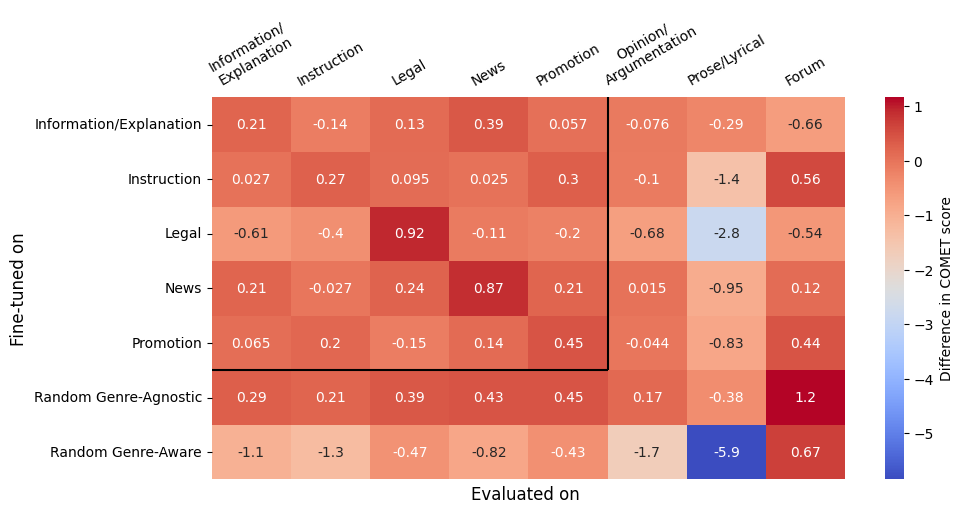

In [11]:
# make a heat map
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

sns.heatmap(dif.astype(float), annot=True, cmap='coolwarm', cbar_kws={'label': 'Difference in COMET score'})

# plt.title('Difference in COMET scores between the OPUS-MT model and the genre-specific models fine-tuned on MaCoCu')
# move the x-ticks on top of the plot

# add darker line under promotion that stops after 6 ticks
plt.hlines(y=5, xmin=0, xmax =5, color='k', linewidth=1.5)
plt.vlines(x=5, ymin=0, ymax=5, color='k', linewidth=1.5)


plt.yticks(rotation=0)
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
plt.xticks(rotation=30)
# no ticks on the y-axis
plt.tight_layout()
# plt.title("Croatian Genre-specific models tested on the Flores devtest")
plt.xlabel('Evaluated on ', fontsize=12)
plt.ylabel('Fine-tuned on', fontsize=12)
plt.savefig('../results/images/full_gen_spec_tr_MaCoCu.png', bbox_inches='tight', transparent=True, dpi=300)
plt.show()

In [12]:
# dif
# make new df with the values from [1,1], [2,2,]], [3,3], [4,4], [5,5], [6,6] and the last row
dif2 = pd.DataFrame(columns=dif.columns[:5], index=['Genre-specific'])
for i in range(5):
    dif2.iloc[0,i] = dif.iloc[i,i]
dif2.loc['Genre-Agnostic (random)'] = dif.loc['Random Genre-Agnostic']
dif2.loc['Genre-Aware (random)'] = dif.loc['Random Genre-Aware']
dif2

,Information/\nExplanation,Instruction,Legal,News,Promotion
Genre-specific,0.206053,0.268847,0.915329,0.873136,0.447653
Genre-Agnostic (random),0.29065,0.210114,0.386574,0.426166,0.446257
Genre-Aware (random),-1.052054,-1.266998,-0.474806,-0.824534,-0.430988


<Figure size 1000x500 with 0 Axes>

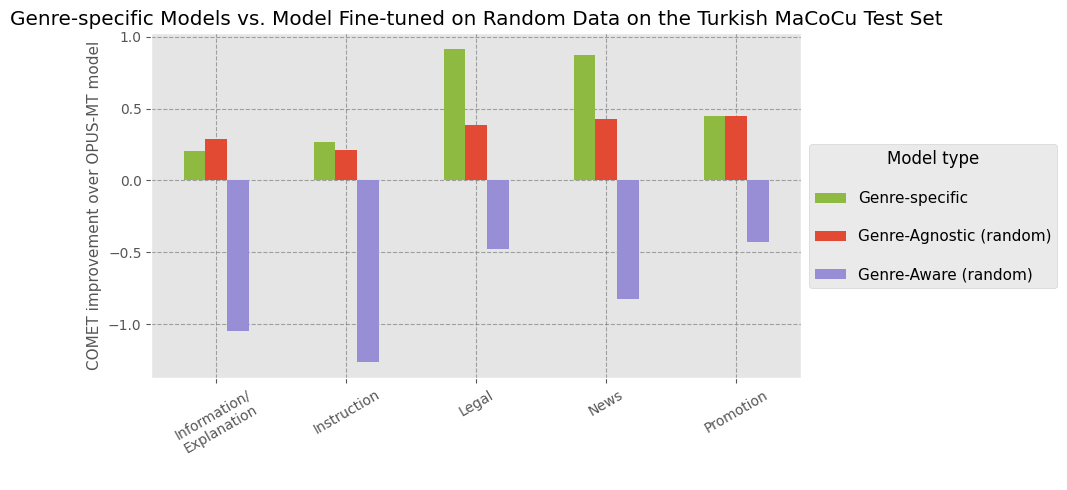

In [13]:
# plot the values in a bar chart
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
colors = ['#8EBA42', '#E24A33', '#988ED5', '#777777']
# plot bar chart grouped by columns
dif2.T.plot(kind='bar', figsize=(10,5), color=colors)
plt.grid(c='grey', alpha=0.7, linestyle='--')

plt.title('Genre-specific Models vs. Model Fine-tuned on Random Data on the Turkish MaCoCu Test Set')
plt.xlabel(' ')
plt.ylabel('COMET improvement over OPUS-MT model', fontsize=11)
plt.xticks(rotation=30)
plt.legend(title='Model type', bbox_to_anchor=(1.0, 0.7), loc='upper left', labelspacing=1.5, fontsize=11, title_fontsize=12)
plt.tight_layout()
plt.savefig('../results/images/gen_spec_tr_bar_macocu.png', bbox_inches='tight', transparent=True, dpi=300)
plt.show()

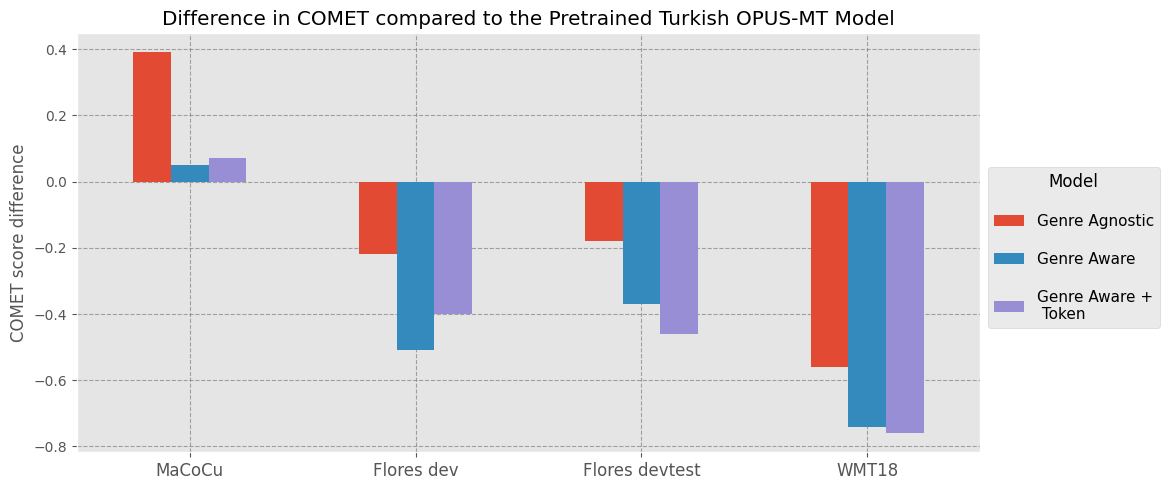

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.style.use('ggplot')

res = pd.read_csv('../results/tr/fine_tune_comet_scores.csv')
# only keep baseline_opus, genre_aware_token_opus and genre_aware_opus
opus = pd.read_csv('../results/tr/opus_comet_scores.csv')
opus['model'] = 'opus'
res = res[res['model'].isin(['baseline_opus', 'genre_aware_token_opus', 'genre_aware_opus'])]
res = pd.concat([res,opus])

var = res.pivot(index='model', columns='test_file', values='comet_std')
var=var.iloc[:-1]


# pivot the table to have the test_files as columns
res['comet_mean'] = res['comet_mean']*100
res = res.pivot(index='model', columns='test_file', values='comet_mean')

res
# compute difference between all rows and the last row
res = res.sub(res.iloc[-1], axis=1).round(2)
# remove last row
res = res.iloc[:-1]
# change index values
res.index = ['Genre Agnostic', 'Genre Aware', 'Genre Aware +\n Token']
res.columns = ['MaCoCu', 'Flores dev', 'Flores devtest', 'WMT18']

res = res.T

# plot a barchart
res.plot(kind='bar', figsize=(10,5))
plt.grid(c='grey', alpha=0.7, linestyle='--')

# transf = [Affine2D().translate(-0.17, 0), Affine2D().translate(-0.07, 0), Affine2D().translate(0.07, 0), Affine2D().translate(0.17, 0)]
# for i, test_file in enumerate(res.columns):
#     print(var[test_file].values)
#     plt.errorbar(x=res_hr.index, y=res_hr[test_file].values, yerr=var[test_file][0], fmt='o', label=test_file, transform=transf[i] + plt.gca().transData, capsize=5, capthick=2, elinewidth=2, linestyle='None')

plt.title('Difference in COMET compared to the Pretrained Turkish OPUS-MT Model')
plt.ylabel('COMET score difference')
# plt.xlabel('Model')
plt.xticks(rotation=0, fontsize=12)
plt.tight_layout()
plt.legend(title='Model', bbox_to_anchor=(1.0, 0.7), loc='upper left', labelspacing=1.5, fontsize=11, title_fontsize=12)
plt.savefig('../results/images/fine_tune_tr.png', bbox_inches='tight', transparent=True, dpi=300)
plt.show()


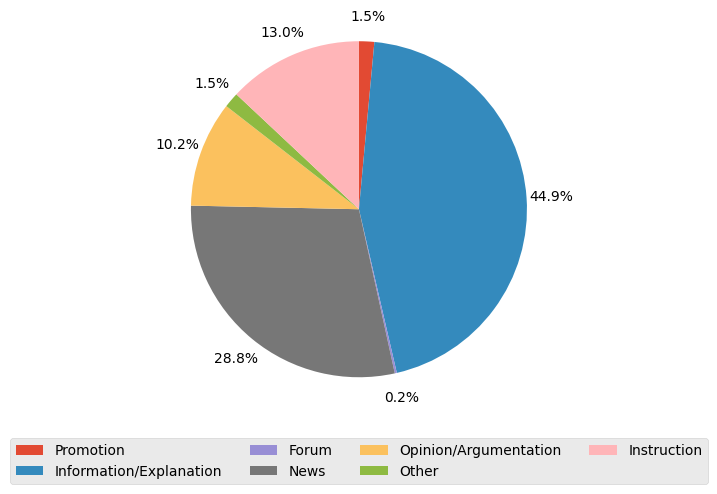

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

is_counts = {"Promotion":15,"Information/Explanation": 459,  "Forum":2, "News": 294, "Opinion/Argumentation": 104, 'Other':15, "Instruction": 133 }
labels = ['Promotion', 'Information/Explanation', 'Forum', 'News', 'Opinion/Argumentation', 'Other', 'Instruction', 'Prose/Lyrical 0%', 'Legal 0%']

# make a pie chart

plt.style.use('ggplot')
fig, ax = plt.subplots()
ax.pie(is_counts.values(), autopct='%1.1f%%', pctdistance=1.15, startangle=90, counterclock=False)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# plt.title('Number of documents per genre in the Flores devtest set')
plt.legend(labels, loc="upper center", ncols = 4, bbox_to_anchor=(0.5, -0.1))
plt.show()





In [85]:
opus = pd.read_csv('../results/is/opus_comet_scores_per_genre.csv')
opus['comet'] = round(opus['comet_mean']*100,2)
# only keep MaCoCu and Information/Explanation, and Legal
opus = opus[opus['test_file'].isin(['MaCoCu'])]
opus = opus[opus['genre'].isin(['Information/Explanation', 'Legal'])]
opus.drop(columns=['seed'], inplace=True)


In [91]:
opus.drop(columns=['comet_mean', 'comet_std','test_file'], inplace=True)

In [92]:
opus

,model,genre,comet
4,baseline_op,Information/Explanation,76.09
6,baseline_op,Legal,77.88


In [88]:
# only keep floresdevtest and MaCoCu
ft_is = pd.read_csv('../results/is/fine_tune_comet_scores_per_genre.csv')
ft_is = ft_is[ft_is['test_file'].isin(['MaCoCu'])]
# only keep Information/Explanation and Legal
ft_is = ft_is[ft_is['genre'].isin(['Information/Explanation', 'Legal'])]
# remove baseline_opus_instr,  baseline_opus_news,  baseline_opus_promo
ft_is = ft_is[~ft_is['model'].str.contains('baseline_opus_instr')]
ft_is = ft_is[~ft_is['model'].str.contains('baseline_opus_news')]
ft_is = ft_is[~ft_is['model'].str.contains('baseline_opus_promo')]
ft_is = ft_is[~ft_is['model'].str.contains('baseline_opus_random')]
# average per model and test_file and genre
ft_is = ft_is.groupby(['model', 'test_file', 'genre']).agg({'comet_mean': ['mean', 'std']})
# drop level 1 of multiindex
ft_is.columns = ft_is.columns.droplevel(0)
# reset index
ft_is = ft_is.reset_index()
ft_is['comet'] = round(ft_is['mean']*100,2)
# remove std and test_file
ft_is = ft_is.drop(columns=['std', 'test_file'])
# pivot
ft_is = ft_is.pivot(index='model', columns='genre', values='comet')
# change index values
ft_is.index = ['Genre Agnostic', 'Genre-specific\nInformation\ \nExplanation', 'Genre-specific\nLegal','Genre Aware', 'Genre Aware +\n Token']


In [89]:
# add row called genre-specific with the values from the genre-specific rows
ft_is.loc['Genre-specific'] = [78.89, 82.69]
# remove genre-specific rows
ft_is = ft_is.drop(index=['Genre-specific\nInformation\ \nExplanation', 'Genre-specific\nLegal'])

In [93]:
ft_is.loc['Baseline'] = [76.09,77.88]

In [96]:
# subtract the values from Baseline from the values in the other rows
dif = ft_is.sub(ft_is.loc['Baseline'], axis=1).round(2)
dif = dif.drop(index=['Baseline'])
dif


genre,Information/Explanation,Legal
Genre Agnostic,5.90,8.09
Genre Aware,5.62,7.88
Genre Aware +\n Token,5.49,7.88
Genre-specific,2.80,4.81


In [103]:
dif

genre,Information/Explanation,Legal
Genre Agnostic,5.90,8.09
Genre Aware,5.62,7.88
Genre Aware +\n Token,5.49,7.88
Genre-specific,2.80,4.81


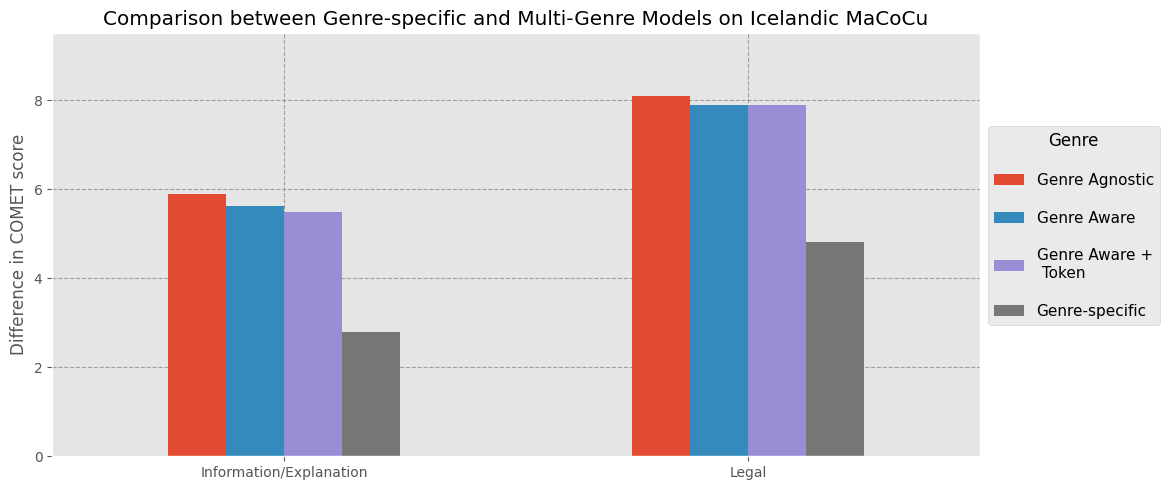

In [107]:
# plot by genre
dif.T.plot(kind='bar', figsize=(10,5))
# no xlabel
plt.xlabel('')
plt.ylim(0, 9.5)
plt.grid(c='grey', alpha=0.7, linestyle='--')
plt.title('Comparison between Genre-specific and Multi-Genre Models on Icelandic MaCoCu')
plt.ylabel('Difference in COMET score')
# plt.xlabel('Model')
plt.xticks(rotation=0)
plt.tight_layout()
plt.legend(title='Genre', bbox_to_anchor=(1.0, 0.8), loc='upper left', labelspacing=1.5, fontsize=11, title_fontsize=12)
plt.savefig('../results/images/spec-vs-multi_is_genres.png', bbox_inches='tight', transparent=True, dpi=300)
plt.show()

In [258]:
opus_is = pd.read_csv('../results/is/opus_comet_scores_per_genre.csv')
ft_is = pd.read_csv('../results/is/fine_tune_comet_scores_per_genre.csv')


opus_is['comet'] = round(opus_is['comet_mean']*100,2)
opus_is['model'] = 'opus'



In [29]:
import pandas as pd
import matplotlib.pyplot as plt

is_doc = pd.read_csv('../results/is/doc_res.csv', header=0, delimiter='\t')  

In [30]:
# change name of the columns to all
is_doc.columns = ['all']
is_doc['test_file'] = is_doc['all'].apply(lambda x: x.split(',')[0])
is_doc['model_name'] = is_doc['all'].apply(lambda x: x.split(',')[1])
is_doc['bleu'] = is_doc['all'].apply(lambda x: x.split(',')[2])

In [31]:
# remove all column
is_doc = is_doc.drop(columns=['all'])
# save to csv
is_doc.to_csv('../results/is/doc_res.csv', index=False)

In [32]:
is_doc

,test_file,model_name,bleu
0,MaCoCu,doc_baseline_1,16.507685552425453
1,MaCoCu,doc_baseline_2,16.378519303677272
2,MaCoCu,doc_baseline_3,16.510605952891748
3,MaCoCu,doc_genre_aware_2,16.36279647026797
4,MaCoCu,doc_genre_aware_3,16.42680009883645
5,MaCoCu,doc_genre_aware_token_3,16.640127507590137
6,MaCoCu,doc_genre_aware_token_2,16.46167628729284
7,MaCoCu,doc_genre_aware_token_1,16.3878073369676
8,MaCoCu,baseline_opus,5.19421018974529
9,floresdev,doc_baseline_1,21.26376107601466


In [33]:
is_doc['seed']=is_doc['model_name'].apply(lambda x: x.split('_')[-1])
is_doc['model_name']=is_doc['model_name'].apply(lambda x: "_".join(x.split('_')[:-1]))

In [34]:
# groupby model name and test file for model_name that isn't baseline
is_doc_no_b = is_doc[is_doc['seed'] != 'opus']
is_doc_no_b['bleu'] = is_doc_no_b['bleu'].astype(float)
is_doc_no_b = is_doc_no_b.groupby(['model_name', 'test_file']).agg({'bleu': ['mean', 'std']})
# drop the top level of the multiindex
is_doc_no_b.columns = is_doc_no_b.columns.droplevel(0)
is_doc_no_b = is_doc_no_b.reset_index()
# # compute the sum of the estimated variances per model per test_file




/tmp/ipykernel_325/3234669276.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  is_doc_no_b['bleu'] = is_doc_no_b['bleu'].astype(float)


In [35]:
is_doc_no_b

,model_name,test_file,mean,std
0,doc_baseline,MaCoCu,16.465604,0.075431
1,doc_baseline,floresdev,21.238775,0.118097
2,doc_baseline,floresdevtest,20.961273,0.034056
3,doc_genre_aware,MaCoCu,16.394798,0.045257
4,doc_genre_aware,floresdev,21.195830,0.081035
5,doc_genre_aware,floresdevtest,20.780916,0.105625
6,doc_genre_aware_token,MaCoCu,16.496537,0.129722
7,doc_genre_aware_token,floresdev,21.145975,0.222846
8,doc_genre_aware_token,floresdevtest,21.235554,0.030555


In [36]:
# remove test_file column
is_doc_no_b=is_doc_no_b.pivot(index='model_name', columns='test_file', values='mean').reset_index()
is_doc_no_b

# # rename index
is_doc_no_b.index = ['Genre Agnostic', 'Genre Aware', 'Genre Aware +\n Token']
# # # rename columns
is_doc_no_b.columns = ['test_file', 'MaCoCu', 'Flores dev', 'Flores devtest']

In [37]:
is_doc[is_doc['seed']=='opus']

,test_file,model_name,bleu,seed
8,MaCoCu,baseline,5.19421018974529,opus
17,floresdev,baseline,18.02194090494548,opus
26,floresdevtest,baseline,17.137800425599192,opus


In [38]:
# add row with index baseline IS
is_doc_no_b.loc['OPUS-MT'] = ['opus_baseline',5.19421018974529, 18.02194090494548, 17.137800425599192]
# HR
# is_doc_no_b.loc['OPUS-MT'] = ['opus_baseline',15.230887, 24.631344, 24.359574]

In [39]:
# change index order
is_doc_no_b = is_doc_no_b.reindex(['OPUS-MT', 'Genre Agnostic', 'Genre Aware', 'Genre Aware +\n Token'])

In [40]:
is_doc_no_b

,test_file,MaCoCu,Flores dev,Flores devtest
OPUS-MT,opus_baseline,5.194210,18.021941,17.137800
Genre Agnostic,doc_baseline,16.465604,21.238775,20.961273
Genre Aware,doc_genre_aware,16.394798,21.195830,20.780916
Genre Aware +\n Token,doc_genre_aware_token,16.496537,21.145975,21.235554


In [41]:
# remove test_file column
is_doc_no_b = is_doc_no_b.drop(columns=['test_file'])


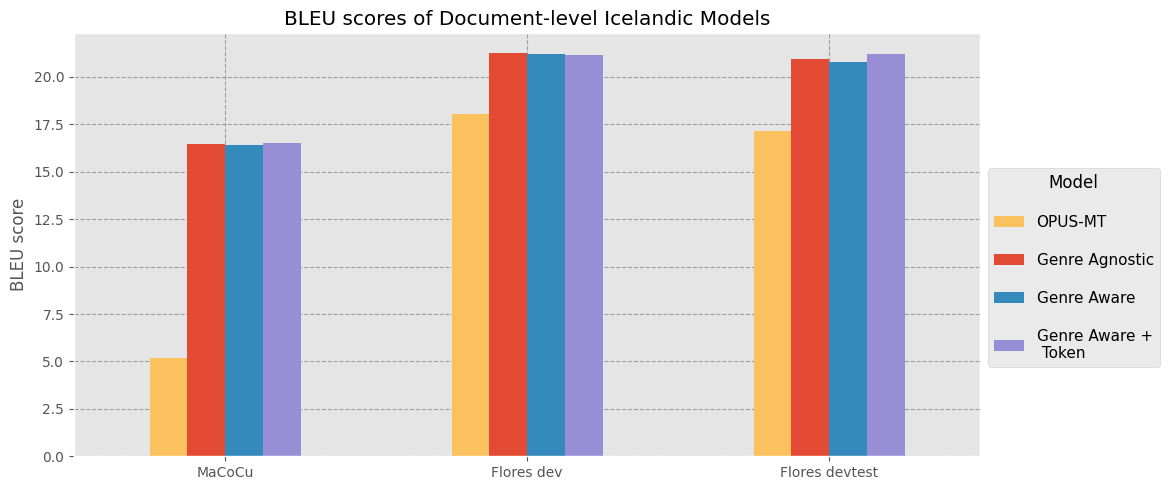

In [43]:
# make a bar plot
import matplotlib.pyplot as plt
plt.style.use('ggplot')
# is_doc_no_b = is_doc_no_b.pivot(index='test_file', columns='model_name', values='mean')
# is_doc_no_b = is_doc_no_b.T
# color list 
colors = ['#FBC15E', '#E24A33', '#348ABD', '#988ED5', '#777777', '#FBC15E', '#8EBA42']
is_doc_no_b.T.plot(kind='bar', figsize=(10,5), color=colors)
plt.grid(c='grey', alpha=0.7, linestyle='--')
plt.title('BLEU scores of Document-level Icelandic Models')
plt.ylabel('BLEU score')
# plt.xlabel('Model')
plt.xticks(rotation=0)
plt.tight_layout()
plt.legend(title='Model', bbox_to_anchor=(1.0, 0.7), loc='upper left', labelspacing=1.5, fontsize=11, title_fontsize=12)
plt.savefig('../results/images/doc_bleu_is.png', bbox_inches='tight', transparent=True, dpi=300)
plt.show()

In [129]:
hr_doc = pd.read_csv('../results/hr/doc_res.csv', header=0, delimiter='\t')  

In [130]:
hr_doc['seed']=hr_doc['model_name'].apply(lambda x: x.split('_')[-1])
hr_doc['model_name']=hr_doc['model_name'].apply(lambda x: "_".join(x.split('_')[:-1]))
hr_doc

,test_file,model_name,bleu,seed
0,MaCoCu,doc_baseline,28.472391,1
1,MaCoCu,doc_baseline,28.641811,2
2,MaCoCu,doc_baseline,28.557923,3
3,MaCoCu,doc_genre_aware,28.637472,1
4,MaCoCu,doc_genre_aware,28.627791,2
5,MaCoCu,doc_genre_aware,28.622283,3
6,MaCoCu,doc_genre_aware_token,28.502510,1
7,MaCoCu,doc_genre_aware_token,28.542218,2
8,MaCoCu,doc_genre_aware_token,28.641835,3
9,MaCoCu,doc_baseline,15.230887,opus


In [131]:
hr_doc_no_b = hr_doc[hr_doc['seed'] != 'opus']

In [132]:
hr_doc_no_b['bleu'] = hr_doc_no_b['bleu'].astype(float)
hr_doc_no_b = hr_doc_no_b.groupby(['model_name', 'test_file']).agg({'bleu': ['mean', 'std']})
# drop the top level of the multiindex
hr_doc_no_b.columns = hr_doc_no_b.columns.droplevel(0)
hr_doc_no_b = hr_doc_no_b.reset_index()


/tmp/ipykernel_13243/1146989018.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hr_doc_no_b['bleu'] = hr_doc_no_b['bleu'].astype(float)


In [133]:
hr_doc_no_b = hr_doc_no_b.pivot(index='model_name', columns='test_file', values='mean').reset_index()

test_file,model_name,MaCoCu,floresdev,floresdevtest
0,doc_baseline,28.557375,27.767734,27.904392
1,doc_genre_aware,28.629182,28.114974,27.915208
2,doc_genre_aware_token,28.562188,27.857327,28.031244


In [134]:
hr_doc = hr_doc[hr_doc['seed'] == 'opus']
hr_doc['bleu'] = hr_doc['bleu'].astype(float)


/tmp/ipykernel_13243/3478621996.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hr_doc['bleu'] = hr_doc['bleu'].astype(float)


In [135]:
hr_doc

,test_file,model_name,bleu,seed
9,MaCoCu,doc_baseline,15.230887,opus
19,floresdev,doc_baseline,24.631344,opus
29,floresdevtest,doc_baseline,24.359574,opus


In [136]:
# add row manually with the values from the baseline model
hr_doc_no_b.loc[3] = ['Baseline', 15.230887, 24.631344, 24.359574]

In [139]:
hr_doc_no_b['model_name'] = ['Genre Agnostic', 'Genre Aware', 'Genre Aware +\n Token', 'Baseline']
# change index order
hr_doc_no_b = hr_doc_no_b.reindex([3, 0, 1, 2])


In [142]:
hr_doc_no_b.columns = ['model_name',  'MaCoCu', 'Flores dev', 'Flores devtest']

In [144]:
hr_doc_no_b

,model_name,MaCoCu,Flores dev,Flores devtest
3,Baseline,15.230887,24.631344,24.359574
0,Genre Agnostic,28.557375,27.767734,27.904392
1,Genre Aware,28.629182,28.114974,27.915208
2,Genre Aware +\n Token,28.562188,27.857327,28.031244


In [257]:
# plot a bar chart
import matplotlib.pyplot as plt
plt.style.use('ggplot')
hr_doc_no_b.plot(kind='bar', x='model_name', figsize=(10,5))
plt.grid(c='grey', alpha=0.7, linestyle='--')
plt.title('BLEU scores of Document-level Croatian Models')
plt.ylabel('BLEU score')
plt.xlabel('')
plt.xticks(rotation=0)
plt.tight_layout()
plt.legend(title='Model', bbox_to_anchor=(1.0, 0.7), loc='upper left', labelspacing=1.5, fontsize=11, title_fontsize=12)
plt.savefig('../results/images/doc_bleu_hr.png', bbox_inches='tight', transparent=True, dpi=300)
plt.show()


NameError: name 'hr_doc_no_b' is not defined